In [5]:
import zipfile
import os

# Correct file path 
zip_path = r"C:\Users\arubombora\PycharmProjects\Assign4\Netflix Data\NetflixData.zip"  
extract_path = r"C:\Users\arubombora\PycharmProjects\Assign4\Netflix Data\extracted_files"

# Ensure the extraction directory exists
os.makedirs(extract_path, exist_ok=True)

# Check if the ZIP file exists before opening it
if not os.path.exists(zip_path):
    raise FileNotFoundError(f"ZIP file not found: {zip_path}")

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Find and rename the first CSV file found
for file in os.listdir(extract_path):
    if file.endswith(".csv"):
        old_csv_path = os.path.join(extract_path, file)
        new_csv_path = os.path.join(extract_path, "Netflix_shows_movies.csv")
        
        os.rename(old_csv_path, new_csv_path)
        print(f"Renamed {file} to Netflix_shows_movies.csv")
        break  # Stop after renaming the first CSV found


Renamed netflix_data.csv to Netflix_shows_movies.csv


In [13]:
print(df.isnull().values.any())  # Returns True if there are missing values


True


In [15]:
import pandas as pd

# Correct file path 
file_path = r"C:\Users\arubombora\PycharmProjects\Assign4\Netflix Data\extracted_files\Netflix_shows_movies.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Check for missing values per column
print(df.isnull().sum())


show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64


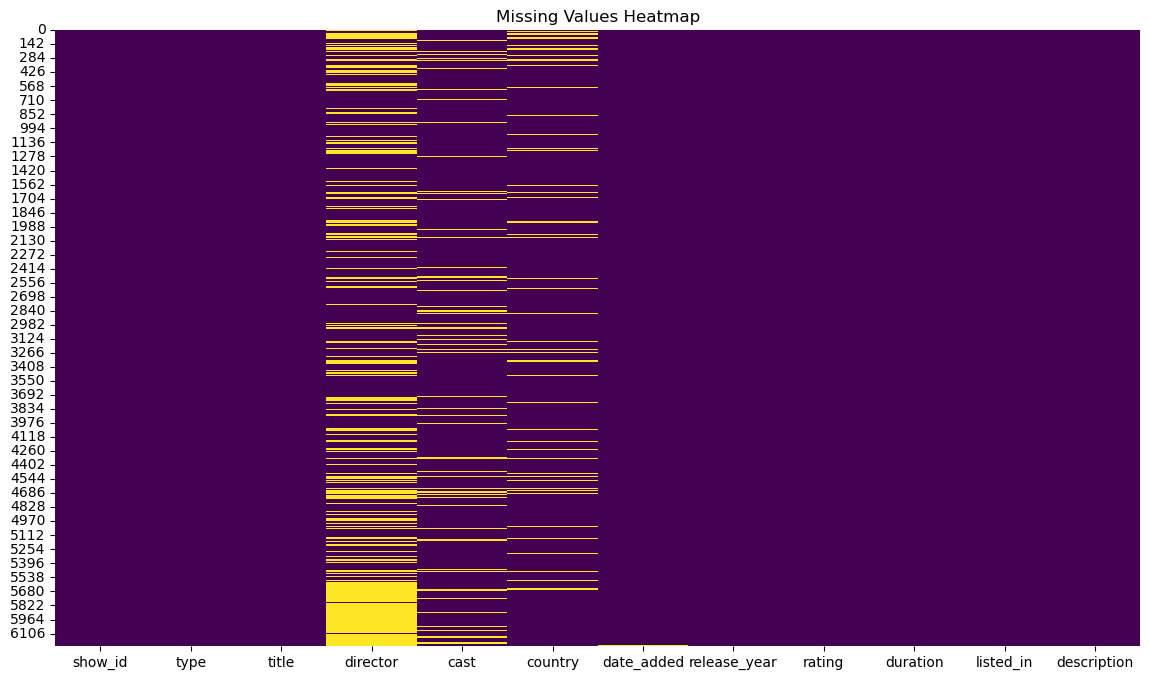

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

In [53]:
# Check for the percentage of missing values per column
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)


show_id          0.000000
type             0.000000
title            0.000000
director        31.584857
cast             9.143407
country          7.635547
date_added       0.176452
release_year     0.000000
rating           0.160411
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64


In [61]:
# Check for class imbalances
class_counts = df['director'].value_counts()
print(class_counts)

# Calculate imbalance ratio
imbalance_ratio = class_counts.max() / class_counts.min()
print(f"Imbalance ratio: {imbalance_ratio}")


director
Raúl Campos, Jan Suter         18
Marcus Raboy                   14
Jay Karas                      13
Jay Chapman                    12
Steven Spielberg                9
                               ..
Peter Mortimer, Josh Lowell     1
Greg Coolidge                   1
Owen Egerton                    1
Sam "Blitz" Bazawule            1
Onur Ünlü                       1
Name: count, Length: 3301, dtype: int64
Imbalance ratio: 18.0


In [63]:
# Check for class imbalances
class_counts = df['cast'].value_counts()
print(class_counts)

# Calculate imbalance ratio
imbalance_ratio = class_counts.max() / class_counts.min()
print(f"Imbalance ratio: {imbalance_ratio}")

cast
David Attenborough                                                                                                                                                                                                                               18
Samuel West                                                                                                                                                                                                                                      10
Jeff Dunham                                                                                                                                                                                                                                       7
Craig Sechler                                                                                                                                                                                                                                     6
Bill Burr          

In [65]:
# Check for class imbalances
class_counts = df['country'].value_counts()
print(class_counts)

# Calculate imbalance ratio
imbalance_ratio = class_counts.max() / class_counts.min()
print(f"Imbalance ratio: {imbalance_ratio}")

country
United States                                    2032
India                                             777
United Kingdom                                    348
Japan                                             176
Canada                                            141
                                                 ... 
India, Japan                                        1
Norway, Germany, Sweden                             1
United Kingdom, Canada, France, United States       1
United Arab Emirates, Jordan                        1
Cyprus, Austria, Thailand                           1
Name: count, Length: 554, dtype: int64
Imbalance ratio: 2032.0


In [75]:
df.loc[:, 'country'] = df['country'].fillna(df['country'].mode()[0])


In [147]:
# Check for the percentage of missing values per column
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

show_id          0.000000
type             0.000000
title            0.000000
director        31.584857
cast             9.143407
country          7.635547
date_added       0.176452
release_year     0.000000
rating           0.160411
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64


In [149]:
df.drop('director', axis=1, inplace=True)


In [155]:
# Check for the percentage of missing values per column
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

show_id         0.000000
type            0.000000
title           0.000000
cast            9.143407
country         7.635547
date_added      0.176452
release_year    0.000000
rating          0.160411
duration        0.000000
listed_in       0.000000
description     0.000000
dtype: float64


In [159]:
df['country'] = df.groupby('title')['country'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))


In [161]:
# Check for the percentage of missing values per column
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

show_id         0.000000
type            0.000000
title           0.000000
cast            9.143407
country         0.000000
date_added      0.176452
release_year    0.000000
rating          0.160411
duration        0.000000
listed_in       0.000000
description     0.000000
dtype: float64


In [163]:
df['cast'] = df.groupby('country')['cast'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))

In [165]:
# Check for the percentage of missing values per column
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

show_id         0.000000
type            0.000000
title           0.000000
cast            0.000000
country         0.000000
date_added      0.176452
release_year    0.000000
rating          0.160411
duration        0.000000
listed_in       0.000000
description     0.000000
dtype: float64


In [167]:
df['date_added'] = df.groupby('release_year')['date_added'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))
df['rating'] = df.groupby('description')['rating'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))

In [169]:
# Check for missing values per column
print(df.isnull().sum())

show_id         0
type            0
title           0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


In [177]:
df['country'].value_counts(normalize=True)


country
United States                                    0.325954
India                                            0.124639
Unknown                                          0.074912
United Kingdom                                   0.055983
Japan                                            0.028232
                                                   ...   
India, Japan                                     0.000160
Norway, Germany, Sweden                          0.000160
United Kingdom, Canada, France, United States    0.000160
United Arab Emirates, Jordan                     0.000160
Cyprus, Austria, Thailand                        0.000160
Name: proportion, Length: 555, dtype: float64

In [179]:
df['cast'].value_counts(normalize=True)

cast
Jeff Dunham                                                                                                                                                      0.037055
Damandeep Singh Baggan, Smita Malhotra, Baba Sehgal                                                                                                              0.013635
David Attenborough                                                                                                                                               0.012352
Unknown                                                                                                                                                          0.008823
Prabhas, Rana Daggubati, Anushka Shetty, Tamannaah Bhatia, Sathyaraj, Nassar, Ramya Krishnan, Sudeep                                                             0.004171
                                                                                                                                                 

In [181]:
# View the first few rows
print(df.head())

# Get basic information about the DataFrame
print(df.info())  # Column types, non-null counts, memory usage

# Check for any missing values
print(df.isnull().sum())

# View summary statistics for numerical columns
print(df.describe())

    show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3  Will Friedle, Darren Criss, Constance Zimmer, ...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   

                                    country date_added  release_year  \
0  United States, India, South Korea, China   9-Sep-19          2019   
1                            United Kingdom   9-Sep-16          2016   
2                             United States   8-Sep-18  

In [183]:
# Summary for categorical columns
print(df['listed_in'].value_counts())

# Proportions for categorical columns
print(df['listed_in'].value_counts(normalize=True))

listed_in
Documentaries                                       299
Stand-Up Comedy                                     273
Dramas, International Movies                        248
Dramas, Independent Movies, International Movies    186
Comedies, Dramas, International Movies              174
                                                   ... 
TV Comedies, TV Dramas, TV Mysteries                  1
Classic Movies, Dramas, LGBTQ Movies                  1
Crime TV Shows, TV Dramas, TV Sci-Fi & Fantasy        1
Docuseries, Reality TV, Teen TV Shows                 1
Reality TV, Spanish-Language TV Shows                 1
Name: count, Length: 461, dtype: int64
listed_in
Documentaries                                       0.047963
Stand-Up Comedy                                     0.043792
Dramas, International Movies                        0.039782
Dramas, Independent Movies, International Movies    0.029836
Comedies, Dramas, International Movies              0.027911
                    

In [185]:
# Check the first few rows of the 'listed_in' column to understand its structure
print(df['listed_in'].head())

0    Children & Family Movies, Comedies
1                       Stand-Up Comedy
2                              Kids' TV
3                              Kids' TV
4                              Comedies
Name: listed_in, dtype: object


In [189]:
# Split the genres and explode the lists into separate rows
genres = df['listed_in'].str.split(',').explode().str.strip()

# View the first few entries
print(genres.head())

0    Children & Family Movies
0                    Comedies
1             Stand-Up Comedy
2                    Kids' TV
3                    Kids' TV
Name: listed_in, dtype: object


In [247]:
#We define our genre
genre_counts = genres.value_counts()

# Display the top 20 genres
print(genre_counts.head(20))

listed_in
International Movies        1927
Dramas                      1623
Comedies                    1113
International TV Shows      1001
Documentaries                668
TV Dramas                    599
Action & Adventure           597
Independent Movies           552
TV Comedies                  436
Thrillers                    392
Children & Family Movies     378
Romantic Movies              376
Crime TV Shows               363
Kids' TV                     328
Stand-Up Comedy              281
Docuseries                   279
Romantic TV Shows            278
Horror Movies                262
Music & Musicals             243
British TV Shows             210
Name: count, dtype: int64


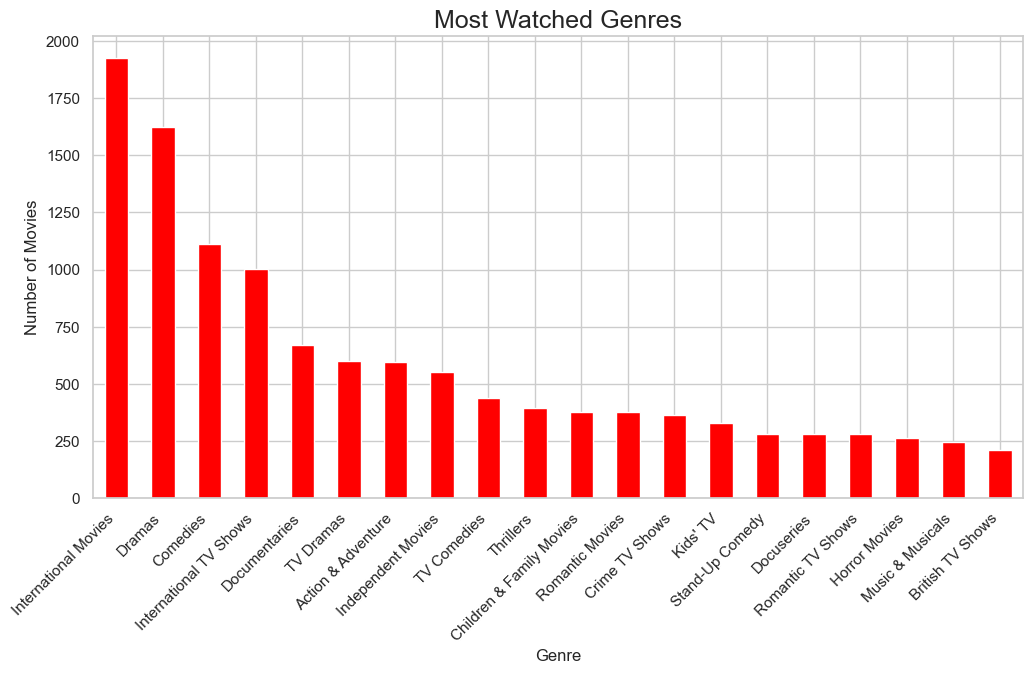

In [249]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Plot the top 20 most common genres
plt.figure(figsize=(12, 6))
genre_counts.head(20).plot(kind='bar', color='red')

plt.title('Most Watched Genres', fontsize=18)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

In [251]:
# We define our rating
rating = df['rating']  

# Displays the top 20 most frequent ratings
rating_counts = rating.value_counts()
print(rating_counts.head(20))  



rating
TV-MA       2027
TV-14       1698
TV-PG        701
R            508
PG-13        286
NR           218
PG           184
TV-Y7        169
TV-G         149
TV-Y         143
TV-Y7-FV      95
G             37
Unknown       10
UR             7
NC-17          2
Name: count, dtype: int64


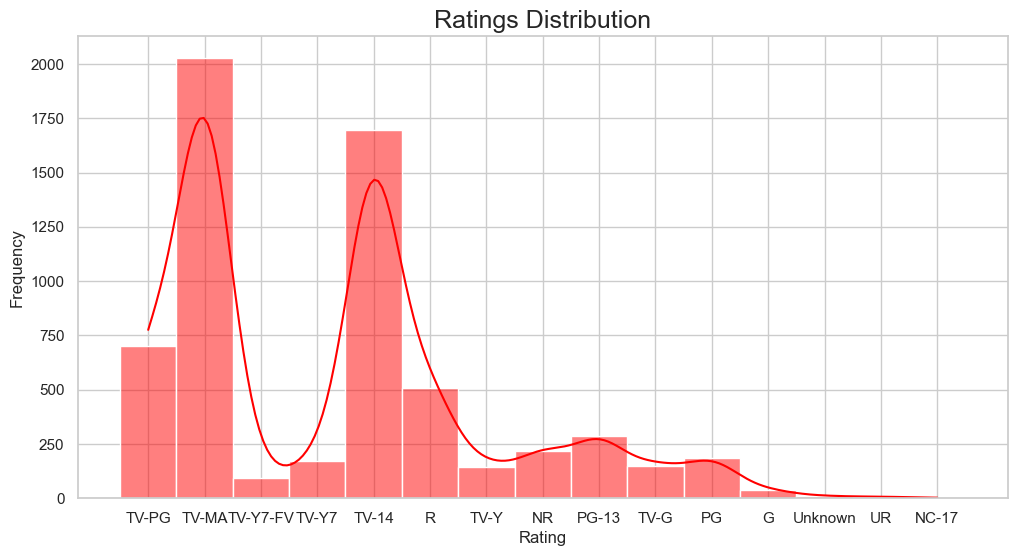

In [267]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plot
sns.set(style="whitegrid")

# Plot the histogram for the 'rating' column
plt.figure(figsize=(12, 6))
sns.histplot(df['rating'], kde=True, color='red', bins=25)

# Title and labels
plt.title('Ratings Distribution', fontsize=18)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()